## Import libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import transaction data and clean up

In [77]:
df1=pd.read_csv('items-2019-04-03-2020-04-03.csv')
df2=pd.read_csv('items-2020-04-03-2021-04-04.csv')
df=pd.concat([df2,df1],ignore_index=True) # with new proper indexes
df=df.drop(['Time Zone','Price Point Name','SKU','Modifiers Applied','Discounts','Net Sales','Tax','Payment ID','Device Name','Notes','Details','Event Type','Location','Customer ID','Customer Name','Customer Reference ID','Unit','Count'],axis=1)
df['Gross Sales'] = df['Gross Sales'].str.replace(',', '')
df['Gross Sales'] = df['Gross Sales'].str.replace('$', '')
df['Gross Sales'] = df['Gross Sales'].astype(float)
df.shape

(55123, 8)

## Transaction Data Preprocessing

In [78]:
# Remove voided transactions and add ons
df=df[~df['Item'].str.contains('(Voided)')]
df=df[~df['Item'].str.contains('Add On')]
df=df.reset_index(drop=True) # reset indexes

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [79]:
# Change quantities for towers
df['Qty'][df['Item'].str.match('FOR FOUR|Seafood Tower for 4', case=True)] = df['Qty']*2
df['Qty'][df['Item'].str.match('FOR SIX|Seafood Tower for 6', case=True)] = df['Qty']*3

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
item_counts=df['Item'].value_counts()
item_counts.shape # how many different items there are to start

(266,)

In [81]:
#df['Item'][df['Category'].str.contains('Towers', case=False)]

In [82]:
# Item names

# Remove fluffer words and special characters
import re
df['Item'] = df['Item'].str.lower() # make lowercase
df['Item'] = df['Item'].str.translate({ord(c): " " for c in "!@#$%^&*()[]{};:,./<>?\|`~-=_+'0123456789"})
df['Item'] = df['Item'].replace('for two','seafood tower')
df['Item'] = df['Item'].replace('for four','seafood tower')
df['Item'] = df['Item'].replace('for six','seafood tower')
df['Item'] = df['Item'].str.replace(' oz',' ')
df['Item'] = df['Item'].str.replace('one',' ')
df['Item'] = df['Item'].str.replace('two',' ')
df['Item'] = df['Item'].str.replace('three',' ')
df['Item'] = df['Item'].str.replace('four',' ')
df['Item'] = df['Item'].str.replace('five',' ')
df['Item'] = df['Item'].str.replace('six',' ')
df['Item'] = df['Item'].str.replace('seven',' ')
df['Item'] = df['Item'].str.replace('eight',' ')
df['Item'] = df['Item'].str.replace('nine',' ')
df['Item'] = df['Item'].str.replace(' and ',' ')
df['Item'] = df['Item'].str.replace('quarter',' ')
df['Item'] = df['Item'].str.replace('half',' ')
df['Item'] = df['Item'].str.replace('quart',' ')
df['Item'] = df['Item'].str.replace('dozen',' ')
df['Item'] = df['Item'].str.replace('for ',' ')
df['Item'] = df['Item'].str.replace('piece',' ')
df['Item'] = df['Item'].str.replace('whole',' ')
df['Item'] = df['Item'].str.replace(' a ',' ')
df['Item'] = df['Item'].str.replace(' an ',' ')
df['Item'] = df['Item'].str.replace('add ',' ')
df['Item'] = df['Item'].replace('\s+', ' ', regex=True) # replace multiple spaces with single space
df['Item'] = df['Item'].str.strip() # remove leading and ending spaces

# Make names consistent (give foods that are the same the same name)
df['Item'][df['Item'].str.contains('caprese|buratta|burrata', case=False)] = 'burrata salad'
df['Item'][df['Item'].str.contains('oysters|coast|buck shuck', case=False)] = 'oysters'
df['Item'][df['Item'].str.contains('perrier|pelligrino', case=False)] = 'water'
df['Item'][df['Item'].str.contains('banana singapore|bananas singapore', case=False)] = 'banana singapore'
df['Item'][df['Item'].str.contains('opah', case=False)] = 'opah'
df['Item'][df['Item'].str.contains('crab cakes', case=False)] = 'crab cakes'
df['Item'][df['Item'].str.contains('red drum', case=False)] = 'red drum'
df['Item'][df['Item'].str.contains('tile fish', case=False)] = 'tile fish'
df['Item'][df['Item'].str.contains('salmon', case=False)] = 'salmon'
df['Item'][df['Item'].str.contains('black sea bass', case=False)] = 'black sea bass'
df['Item'][df['Item'].str.contains('wolfish', case=False)] = 'wolf fish'
df['Item'][df['Item'].str.contains('haricot vert', case=False)] = 'haricots verts'
df['Item'][df['Item'].str.contains('expresso', case=False)] = 'espresso'
df['Item'][df['Item'].str.contains('capuchino', case=False)] = 'cappuccino'
df['Item'][df['Item'].str.contains('wall eye', case=False)] = 'walleye'
df['Item'][df['Item'].str.contains('tautaug', case=False)] = 'tautog'
df['Item'][df['Item'].str.contains('twin lobster tails', case=False)] = 'twin tails'
df['Item'][df['Item'].str.contains('mussels', case=False)] = 'mussels'
df['Item'][df['Item'].str.contains('lobster tail fillet', case=False)] = 'surf turf tenderloin'
print(len(df['Item'].value_counts())) # How many unique items are there?

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

198


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [83]:
# Create Item Type column

df['Item Type'] = np.where(df['Item'].str.contains('beet', case=False),'beet','') # just to get it started
df['Item Type'] = np.where(df['Item'].str.contains('mayo|salsa|sauce|cream', case=False),'condiments',df['Item Type'])
df['Item Type'] = np.where(df['Item'].str.contains('wedge|potato salad|brussel sprouts|haricots verts|carrots|broccoli|snap peas|asparagus|beet|zucchini|watermelon|lemons', case=False),'veg fruit',df['Item Type'])
df['Item Type'] = np.where(df['Item'].str.contains('mashed potatoes', case=False),'garlic smashed',df['Item Type'])

types=(['surf turf','cheeks','steak','trout','box','bread','orzo',
        'john dory','garlic smashed','hake',
       'black sea bass','swordfish','platter','bronzino','fillet special',
        'tuna','seafood tower','barramundi','red drum','opah','custom amount','black bass',
       'grouper','shark','halibut','merluza','wahoo','wolf fish','burrata',
       'dover sole','corvina','clams casino','red snapper','dorato','onaga','blue fish','barracuda',
       'seafood lasagna','smoked trout','soup','monkfish','lobster','hapuku',
        'crab','mussels','oysters','salmon','tenderloin','chilean sea bass','scallops','avocado','tautog',
        'tile fish','shrimp','lamb','steelhead trout','octopus','cobia','kanpachi','orange roughy','skate','cod',
       'walleye','pacifico bass','prawns','parrot fish','arctic char','alaskan claw','alaskan ling','pompano',
       'turbot fish','opaka blue snapper','red rock','scorpion','striped bass','acadian redfish','cusk','monchong'])
for i in range(len(types)):
    df['Item Type'] = np.where(df['Item'].str.contains(types[i], case=False),types[i],df['Item Type'])
    
df['Item Type'] = np.where(df['Category'].str.contains('Dessert', case=False),'dessert',df['Item Type'])
df['Item Type'] = np.where(df['Category'].str.contains('Gift Box', case=False),'gift',df['Item Type'])
df['Item Type'] = np.where(df['Category'].str.contains('Beverage', case=False),'beverage',df['Item Type'])
df['Item Type'] = np.where(df['Item'].str.contains('key lime pie|banana singapore|lemon curd|pot de creme|sheet cake', case=False),'dessert',df['Item Type'])
df['Item Type'] = np.where(df['Item'].str.contains('gift card', case=False),'gift',df['Item Type'])
df['Item Type'] = np.where(df['Item'].str.contains('moon fish|moonfish', case=False),'opah',df['Item Type'])
df['Item Type'] = np.where(df['Item'].str.contains('festival|kentucky', case=False),'event',df['Item Type'])
df['Item Type'] = np.where(df['Item'].str.contains('twin tails', case=False),'lobster',df['Item Type'])

print(len(types)) # how many different item types did i make
empty=np.where(df.applymap(lambda x: x == ''))
df.iloc[empty[0]]

78


,Date,Time,Category,Item,Qty,Gross Sales,Transaction ID,Dining Option,Item Type
19187,08/22/20,14:58:25,None,noah s dove micros,1.0,6.0,GYcMyib5ZzrrIjxTd6rzHekgn5LZY,NaN,
27397,05/23/20,12:24:14,None,noah s dove basil,1.0,6.0,cPSEWOk5m5Ek9gCDKCtWv2FL54EZY,NaN,
27538,05/21/20,14:33:18,None,noah s dove micros,1.0,6.0,ATZlb44b1CeygF6qImm3U5L6tsLZY,NaN,
27677,05/14/20,21:03:49,None,water,1.0,2.0,yUncQodOSDRdONYEpWJfFIpXArCZY,NaN,
33707,01/04/20,20:52:22,Main Course,split,1.0,5.0,llyU8UWCkXGb0giEjpXB4H7eV,For Here,
34217,12/28/19,22:09:18,Sides,bok choy,1.0,9.0,3YZzZHeAWQszTanPf710CvmeV,For Here,
34251,12/28/19,21:50:21,Sides,bok choy,1.0,9.0,neKopFhhz1DSve5426KS1y3eV,For Here,
34299,12/28/19,21:46:20,Sides,bok choy,1.0,9.0,z0iUty7ADb8mdA65DH8r8lreV,For Here,
34415,12/28/19,18:39:40,Sides,bok choy,1.0,9.0,zqXVJbzuY9ojqyohONnYNg3eV,For Here,
34418,12/28/19,18:22:23,Main Course,split,2.0,10.0,xFxPnB8cOUtpgoFHxV9D5fieV,For Here,


In [84]:
# Meat (is the item meat?)

meat=(['surf turf','cheeks','steak','trout','john dory','hake',
       'black sea bass','swordfish','platter','bronzino','fillet special',
        'tuna','seafood tower','barramundi','red drum','opah','black bass',
       'grouper','shark','halibut','merluza','wahoo','wolf fish',
       'dover sole','corvina','clams casino','red snapper','dorato','onaga','blue fish','barracuda',
       'seafood lasagna','smoked trout','monkfish','lobster','hapuku',
        'crab','mussels','oysters','salmon','tenderloin','chilean sea bass','scallops','tautog',
        'tile fish','shrimp','lamb','steelhead trout','octopus','cobia','kanpachi','orange roughy','skate','cod',
       'walleye','pacifico bass','prawns','parrot fish','arctic char','alaskan claw','alaskan ling','pompano',
       'turbot fish','opaka blue snapper','red rock','scorpion','striped bass','acadian redfish','cusk','monchong'])

df['Meat'] = np.where(df['Item Type'].str.contains('lobster', case=False),1,0) # get it started
for i in range(len(meat)):
    df['Meat'] = np.where(df['Item Type'].str.contains(meat[i], case=False),1,df['Meat'])

In [85]:
# Date
df['Date'] = pd.to_datetime(df['Date']) # turn dates into pandas dates
df['Day of week'] = df['Date'].dt.day_name() # create day of week column
df['Day of week'] = df['Day of week'].str.replace('Sunday','0') # Turn day of week names into integers
df['Day of week'] = df['Day of week'].str.replace('Monday','1')
df['Day of week'] = df['Day of week'].str.replace('Tuesday','2')
df['Day of week'] = df['Day of week'].str.replace('Wednesday','3')
df['Day of week'] = df['Day of week'].str.replace('Thursday','4')
df['Day of week'] = df['Day of week'].str.replace('Friday','5')
df['Day of week'] = df['Day of week'].str.replace('Saturday','6')
df['Day of week'] = df['Day of week'].astype(int) # make integers
df['Month'] = pd.DatetimeIndex(df['Date']).month # create month column

In [86]:
# Create variable with all days
# I decided to handle times where they sold none of an item differently so this isnt used

from datetime import timedelta
alldays=[0]*732
date1=pd.to_datetime('04/03/2019')
for i in range(732):
    alldays[i]=[date1+timedelta(days=i)]

# Create dataframe with all Dates + Day of week , Month , Qty
alldays_df = pd.DataFrame(alldays,columns=['Date']) # turn list into df
alldays_df['Day of week'] = alldays_df['Date'].dt.day_name() # create day of week column
alldays_df['Item'] = 'None' # create item column of all None's
alldays_df['Month'] = pd.DatetimeIndex(alldays_df['Date']).month # create month column
alldays_df['Qty'] = 0 # create Qty column of all 0's

In [87]:
# Time
df['Time'] = df['Time'].astype(str) # make Time column strings
df['Hour'] = df['Time'].str.slice(stop=2) # create hour feature
df['Hour']=df['Hour'].astype(int)

In [88]:
print(len(types))
item_counts=df['Item Type'].value_counts()
print(item_counts.shape)
df.head

78
(85,)


<bound method NDFrame.head of             Date      Time      Category                     Item   Qty  \
0     2021-04-03  22:03:53         Salad               beet salad   2.0   
1     2021-04-03  22:03:53      Starters            avocado toast   2.0   
2     2021-04-03  22:03:53      Starters          shrimp cocktail   2.0   
3     2021-04-03  22:03:53      Starters                  mussels   1.0   
4     2021-04-03  22:03:53       Raw Bar                  oysters   6.0   
5     2021-04-03  22:03:53  Main Course                    salmon   1.0   
6     2021-04-03  22:03:53  Main Course      surf turf tenderloin   1.0   
7     2021-04-03  22:03:53  Main Course                tenderloin   1.0   
8     2021-04-03  22:03:53  Main Course          chilean sea bass   1.0   
9     2021-04-03  22:03:53  Main Course                crab cakes   2.0   
10    2021-04-03  22:03:53         Sides           garlic smashed   2.0   
11    2021-04-03  22:03:53  Main Course                  scallops   1.

In [96]:
df_food=df[['Date','Month','Day of week','Hour','Item','Qty']] # Keep subset
df_food.head

<bound method NDFrame.head of             Date  Month  Day of week  Hour                     Item   Qty
0     2021-04-03      4            6    22               beet salad   2.0
1     2021-04-03      4            6    22            avocado toast   2.0
2     2021-04-03      4            6    22          shrimp cocktail   2.0
3     2021-04-03      4            6    22                  mussels   1.0
4     2021-04-03      4            6    22                  oysters   6.0
5     2021-04-03      4            6    22                   salmon   1.0
6     2021-04-03      4            6    22     surf turf tenderloin   1.0
7     2021-04-03      4            6    22               tenderloin   1.0
8     2021-04-03      4            6    22         chilean sea bass   1.0
9     2021-04-03      4            6    22               crab cakes   2.0
10    2021-04-03      4            6    22           garlic smashed   2.0
11    2021-04-03      4            6    22                 scallops   1.0
12    20

## Import guests data sets (open table)

In [93]:
columns = ['Visit Date', 'Visit Time','Size','Status','Completed Visits']
df3=pd.read_csv('guests_1_2_2020-12_31_2020.csv',usecols=columns)
df4=pd.read_csv('guests_1_6_2021-5_28_2021.csv',usecols=columns)
df_guests=pd.concat([df3,df4],ignore_index=True) # with new proper indexes

# Drop canceled reservations
df_guests=df_guests[~df_guests.Status.str.contains("Canceled")] # I kept no shows and "Assumed" stuff

# Dates
df_guests['Visit Date'] = pd.to_datetime(df_guests['Visit Date']) # turn dates into pandas dates
# Time
df_guests['Visit Time'] = df_guests['Visit Time'].astype(str) # make Visit Time column strings
df_guests['Hour'] = df_guests['Visit Time'].str.slice(stop=2) # create hour feature
df_guests['Hour']=df_guests['Hour'].astype(int)

df_guests=df_guests.reset_index(drop=True) # reset indexes
print(df_guests.shape)
df_guests.head

(5038, 6)


<bound method NDFrame.head of      Visit Date Visit Time  Size          Status  Completed Visits  Hour
0    2020-01-02      19:00     3            Done               8.0    19
1    2020-01-02      18:30     3            Done               1.0    18
2    2020-01-02      18:00    10            Done               9.0    18
3    2020-01-02      18:00     2            Done               4.0    18
4    2020-01-02      18:00     3            Done               1.0    18
5    2020-01-02      18:30     2            Done               2.0    18
6    2020-01-02      19:00    12            Done               8.0    19
7    2020-01-03      18:00     2            Done               3.0    18
8    2020-01-03      18:30     8            Done               3.0    18
9    2020-01-03      17:15     2            Done               2.0    17
10   2020-01-03      20:00     2            Done               1.0    20
11   2020-01-03      18:30     6            Done               1.0    18
12   2020-01-03      

In [97]:
# Save out preprocessed data as new data set
df_food.to_csv("preprocessed_food.csv",index=False)
df_guests.to_csv("preprocessed_guests.csv",index=False)

## Plot sales per day of week

In [14]:
wed_sales=0
thu_sales=0
fri_sales=0
sat_sales=0
for i in range(df.shape[0]-1):
    if df['Day of week'][i] == 'Wednesday':
        wed_sales=wed_sales+df['Gross Sales'][0]
    else:
        if df['Day of week'][i] == 'Thursday':
            thu_sales=thu_sales+df['Gross Sales'][0]
        else:
            if df['Day of week'][i] == 'Friday':
                fri_sales=fri_sales+df['Gross Sales'][0]
            else:
                if df['Day of week'][i] == 'Saturday':
                    sat_sales=sat_sales+df['Gross Sales'][0]

{'Wednesday': 310704.0, 'Thursday': 160920.0, 'Friday': 343200.0, 'Saturday': 468696.0}


Text(0, 0.5, 'Total Gross Sales ($)')

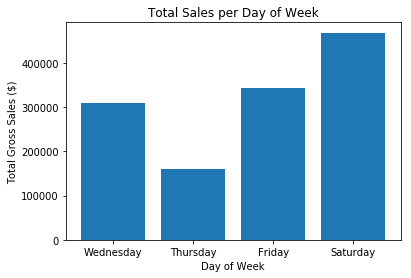

In [15]:
days={'Wednesday':wed_sales,'Thursday':thu_sales,'Friday':fri_sales,'Saturday':sat_sales}
print(days)
plt.bar(days.keys(),days.values())
plt.title('Total Sales per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Gross Sales ($)')

## Plot sales per hour

In [16]:
hour_sales=[0]*24
for i in range(df.shape[0]-1):
    hour_sales[df['Hour'][i]]+=df['Gross Sales'][i]

Text(0, 0.5, 'Total Gross Sales ($)')

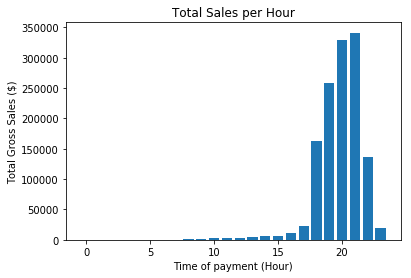

In [17]:
plt.bar(range(24),hour_sales)
plt.title('Total Sales per Hour')
plt.xlabel('Time of payment (Hour)')
plt.ylabel('Total Gross Sales ($)')

## Plot sales per month

In [18]:
# They were closed spring 2020!
month_sales=[0]*12
for i in range(df.shape[0]-1):
    month_sales[df['Month'][i]-1]+=df['Gross Sales'][i]

Text(0, 0.5, 'Total Gross Sales ($)')

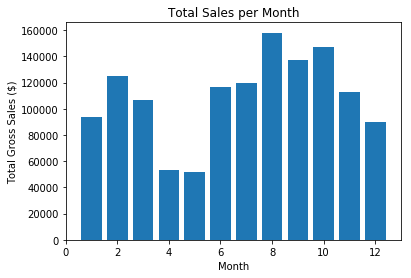

In [19]:
plt.bar(range(1,13),month_sales)
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Gross Sales ($)')

## Item histogram

Text(0, 0.5, 'Quantity')

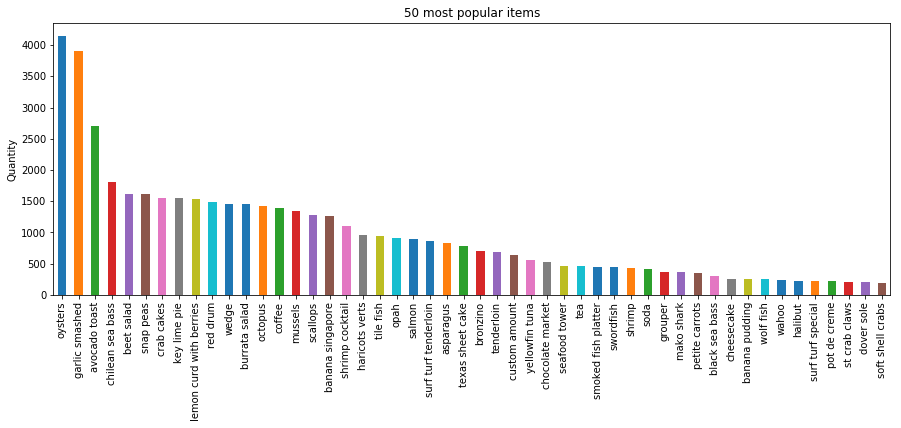

In [20]:
# not including quantity of each transaction
item_counts=df['Item'].value_counts()
plt.figure(figsize=(15,5))
item_counts[0:50].plot(kind='bar')
plt.title('50 most popular items')
plt.ylabel('Quantity')

In [21]:
#print(item_counts[-50:-1])
print(item_counts.shape)

(198,)


Text(0, 0.5, 'Gross Sales ($)')

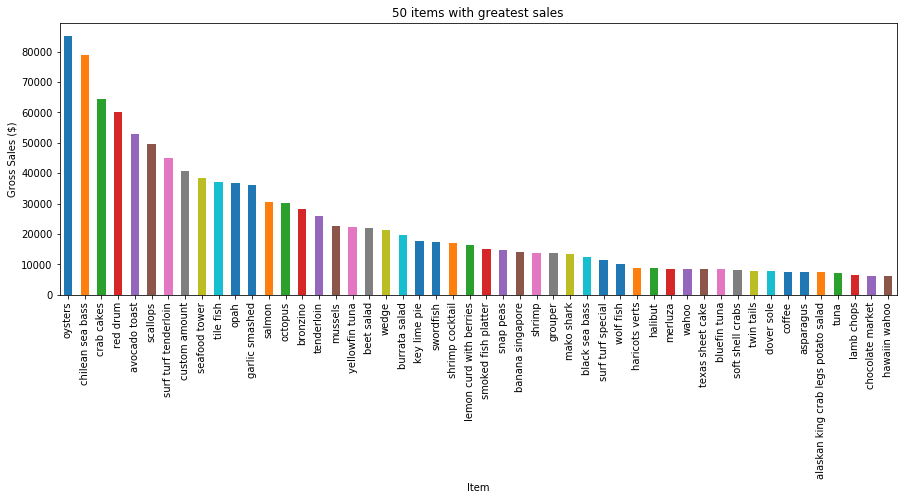

In [22]:
item_sums=df.groupby('Item').sum()
item_sums=item_sums.sort_values(by=['Gross Sales'], ascending=False)
plt.figure(figsize=(15,5))
item_sums['Gross Sales'][0:50].plot(kind='bar')
plt.title('50 items with greatest sales')
plt.ylabel('Gross Sales ($)')

Text(0, 0.5, 'Gross Sales ($)')

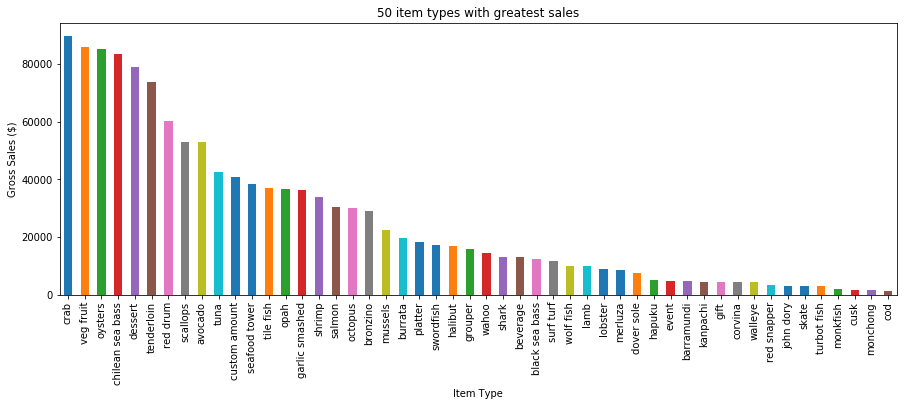

In [23]:
item_sums=df.groupby('Item Type').sum()
item_sums=item_sums.sort_values(by=['Gross Sales'], ascending=False)
plt.figure(figsize=(15,5))
item_sums['Gross Sales'][0:50].plot(kind='bar')
plt.title('50 item types with greatest sales')
plt.ylabel('Gross Sales ($)')

## Oysters

In [24]:
wed_oysters=0
thu_oysters=0
fri_oysters=0
sat_oysters=0
for i in range(df.shape[0]-1):
    if df['Item'][i] == 'oysters':
        if df['Day of week'][i] == 'Wednesday':
            wed_oysters=wed_oysters+df['Gross Sales'][0]
        else:
            if df['Day of week'][i] == 'Thursday':
                thu_oysters=thu_oysters+df['Gross Sales'][0]
            else:
                if df['Day of week'][i] == 'Friday':
                    fri_oysters=fri_oysters+df['Gross Sales'][0]
                else:
                    if df['Day of week'][i] == 'Saturday':
                        sat_oysters=sat_oysters+df['Gross Sales'][0]

[Text(0, 0.5, 'Percent of Sales (%)'), Text(0.5, 0, 'Day of Week')]

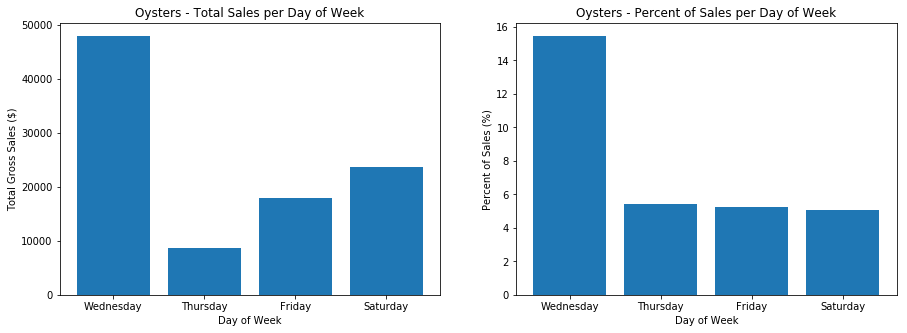

In [25]:
days={'Wednesday':wed_oysters,'Thursday':thu_oysters,'Friday':fri_oysters,'Saturday':sat_oysters}
days_percent={'Wednesday':100*wed_oysters/wed_sales,'Thursday':100*thu_oysters/thu_sales,'Friday':100*fri_oysters/fri_sales,'Saturday':100*sat_oysters/sat_sales}

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.bar(days.keys(),days.values())
ax1.set_title('Oysters - Total Sales per Day of Week')
ax1.set(xlabel='Day of Week', ylabel='Total Gross Sales ($)')

ax2.bar(days_percent.keys(),days_percent.values())
ax2.set_title('Oysters - Percent of Sales per Day of Week')
ax2.set(xlabel='Day of Week', ylabel='Percent of Sales (%)')

In [26]:
month_oysters=[0]*12
for i in range(df.shape[0]-1):
    if df['Item'][i] == 'oysters':
        month_oysters[df['Month'][i]-1]+=df['Gross Sales'][i]

Text(0, 0.5, 'Percent of Sales (%)')

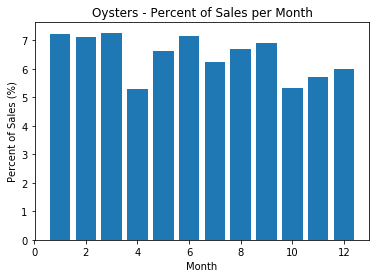

In [27]:
perc_oysters = [100*i / j for i, j in zip(month_oysters, month_sales)]
plt.bar(range(1,13),perc_oysters)
plt.title('Oysters - Percent of Sales per Month')
plt.xlabel('Month')
plt.ylabel('Percent of Sales (%)')

## Chilean sea bass

In [28]:
wed_chi_sea_bass=0
thu_chi_sea_bass=0
fri_chi_sea_bass=0
sat_chi_sea_bass=0
for i in range(df.shape[0]-1):
    if df['Item'][i] == 'chilean sea bass':
        if df['Day of week'][i] == 'Wednesday':
            wed_chi_sea_bass=wed_chi_sea_bass+df['Gross Sales'][0]
        else:
            if df['Day of week'][i] == 'Thursday':
                thu_chi_sea_bass=thu_chi_sea_bass+df['Gross Sales'][0]
            else:
                if df['Day of week'][i] == 'Friday':
                    fri_chi_sea_bass=fri_chi_sea_bass+df['Gross Sales'][0]
                else:
                    if df['Day of week'][i] == 'Saturday':
                        sat_chi_sea_bass=sat_chi_sea_bass+df['Gross Sales'][0]

[Text(0, 0.5, 'Percent of Sales (%)'), Text(0.5, 0, 'Day of Week')]

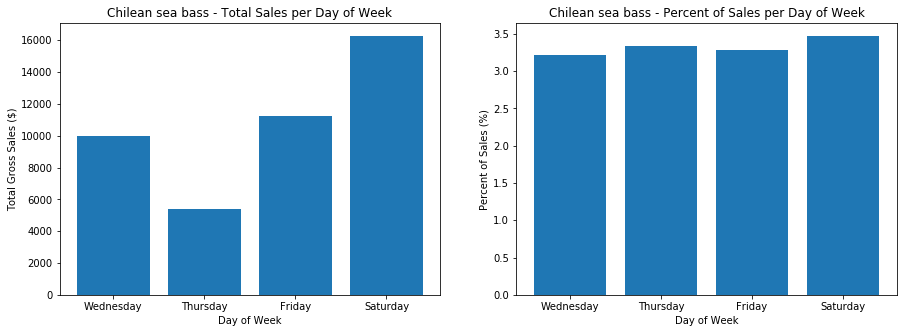

In [29]:
days={'Wednesday':wed_chi_sea_bass,'Thursday':thu_chi_sea_bass,'Friday':fri_chi_sea_bass,'Saturday':sat_chi_sea_bass}
days_percent={'Wednesday':100*wed_chi_sea_bass/wed_sales,'Thursday':100*thu_chi_sea_bass/thu_sales,'Friday':100*fri_chi_sea_bass/fri_sales,'Saturday':100*sat_chi_sea_bass/sat_sales}

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.bar(days.keys(),days.values())
ax1.set_title('Chilean sea bass - Total Sales per Day of Week')
ax1.set(xlabel='Day of Week', ylabel='Total Gross Sales ($)')

ax2.bar(days_percent.keys(),days_percent.values())
ax2.set_title('Chilean sea bass - Percent of Sales per Day of Week')
ax2.set(xlabel='Day of Week', ylabel='Percent of Sales (%)')

In [30]:
month_chi_sea_bass=[0]*12
for i in range(df.shape[0]-1):
    if df['Item'][i] == 'chilean sea bass':
        month_chi_sea_bass[df['Month'][i]-1]+=df['Gross Sales'][i]

Text(0, 0.5, 'Percent of Sales (%)')

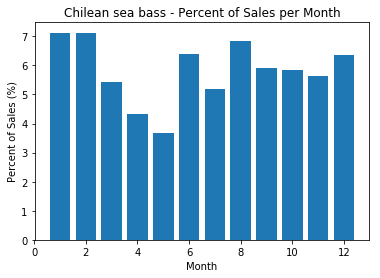

In [31]:
perc_chi_sea_bass = [100*i / j for i, j in zip(month_chi_sea_bass, month_sales)]
plt.bar(range(1,13),perc_chi_sea_bass)
plt.title('Chilean sea bass - Percent of Sales per Month')
plt.xlabel('Month')
plt.ylabel('Percent of Sales (%)')

## Meat

In [32]:
month_meat=[0]*12
for i in range(df.shape[0]-1):
    if df['Meat'][i] == 1:
        month_meat[df['Month'][i]-1]+=df['Gross Sales'][i]

Text(0, 0.5, 'Percent of Sales (%)')

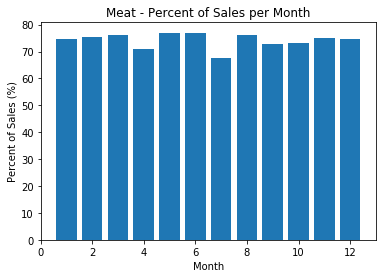

In [33]:
perc_meat = [100*i / j for i, j in zip(month_meat, month_sales)]
plt.bar(range(1,13),perc_meat)
plt.title('Meat - Percent of Sales per Month')
plt.xlabel('Month')
plt.ylabel('Percent of Sales (%)')